In [1]:
# import dependencies and check the versions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from platform import python_version
%matplotlib inline

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)
print('Python version', python_version())

#for more clear plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Numpy version: 1.12.1
Pandas version: 0.20.1
Matplotlib version: 2.0.2
Python version 3.6.1


In [2]:
def getData():
    '''This functions dowloands the dataset and cleans it'''
    # url of the dataset
    url = 'https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2012-2017%20Battery%20Electric%20Vehicles.csv'
    
    #read the data. encoding lation1 allows both windows and ma to download dataset.     
    data = pd.read_csv(url, encoding='latin1', header=1)
    
    #rename the columns that has no names
    data = data.rename(columns={'Unnamed: 1':'MAKE', 'Unnamed: 2':'MODEL', '(km)':'RANGE(KM)'})
    
    #choose the columns that necessary for this project
    data = data[['YEAR', 'MAKE','MODEL','RANGE(KM)']]
    
    # csv fle has some explanation about the dataset. We onlt need to data from 84 and above
    data = data.iloc[:84]
    
    # convert range and year columns to integer
    data['RANGE(KM)'] = data['RANGE(KM)'].astype(int)    
    data['YEAR'] = data['YEAR'].astype(int)
    
    #remove the white space.   
    data['MAKE'] = data['MAKE'].str.strip()
    data['MODEL'] = data['MODEL'].str.strip()
    
    #group each car maker with their max range models
    data = data[data['RANGE(KM)'] == data.groupby(['YEAR','MAKE'])['RANGE(KM)'].transform(max)]

    return data

In [10]:
# let's look at the last 10 rows of the dataset
getData().tail(10)

,YEAR,MAKE,MODEL,RANGE(KM)
55,2016,TESLA,MODEL S P100D,507
62,2017,BMW,i3 (94 Ah),183
63,2017,CHEVROLET,BOLT EV,383
64,2017,FORD,FOCUS ELECTRIC,185
65,2017,HYUNDAI,IONIQ EV,200
66,2017,KIA,SOUL EV,150
67,2017,MITSUBISHI,i-MiEV,100
68,2017,NISSAN,LEAF,172
74,2017,TESLA,MODEL S 100D,539
83,2017,VOLKSWAGEN,e-GOLF,201


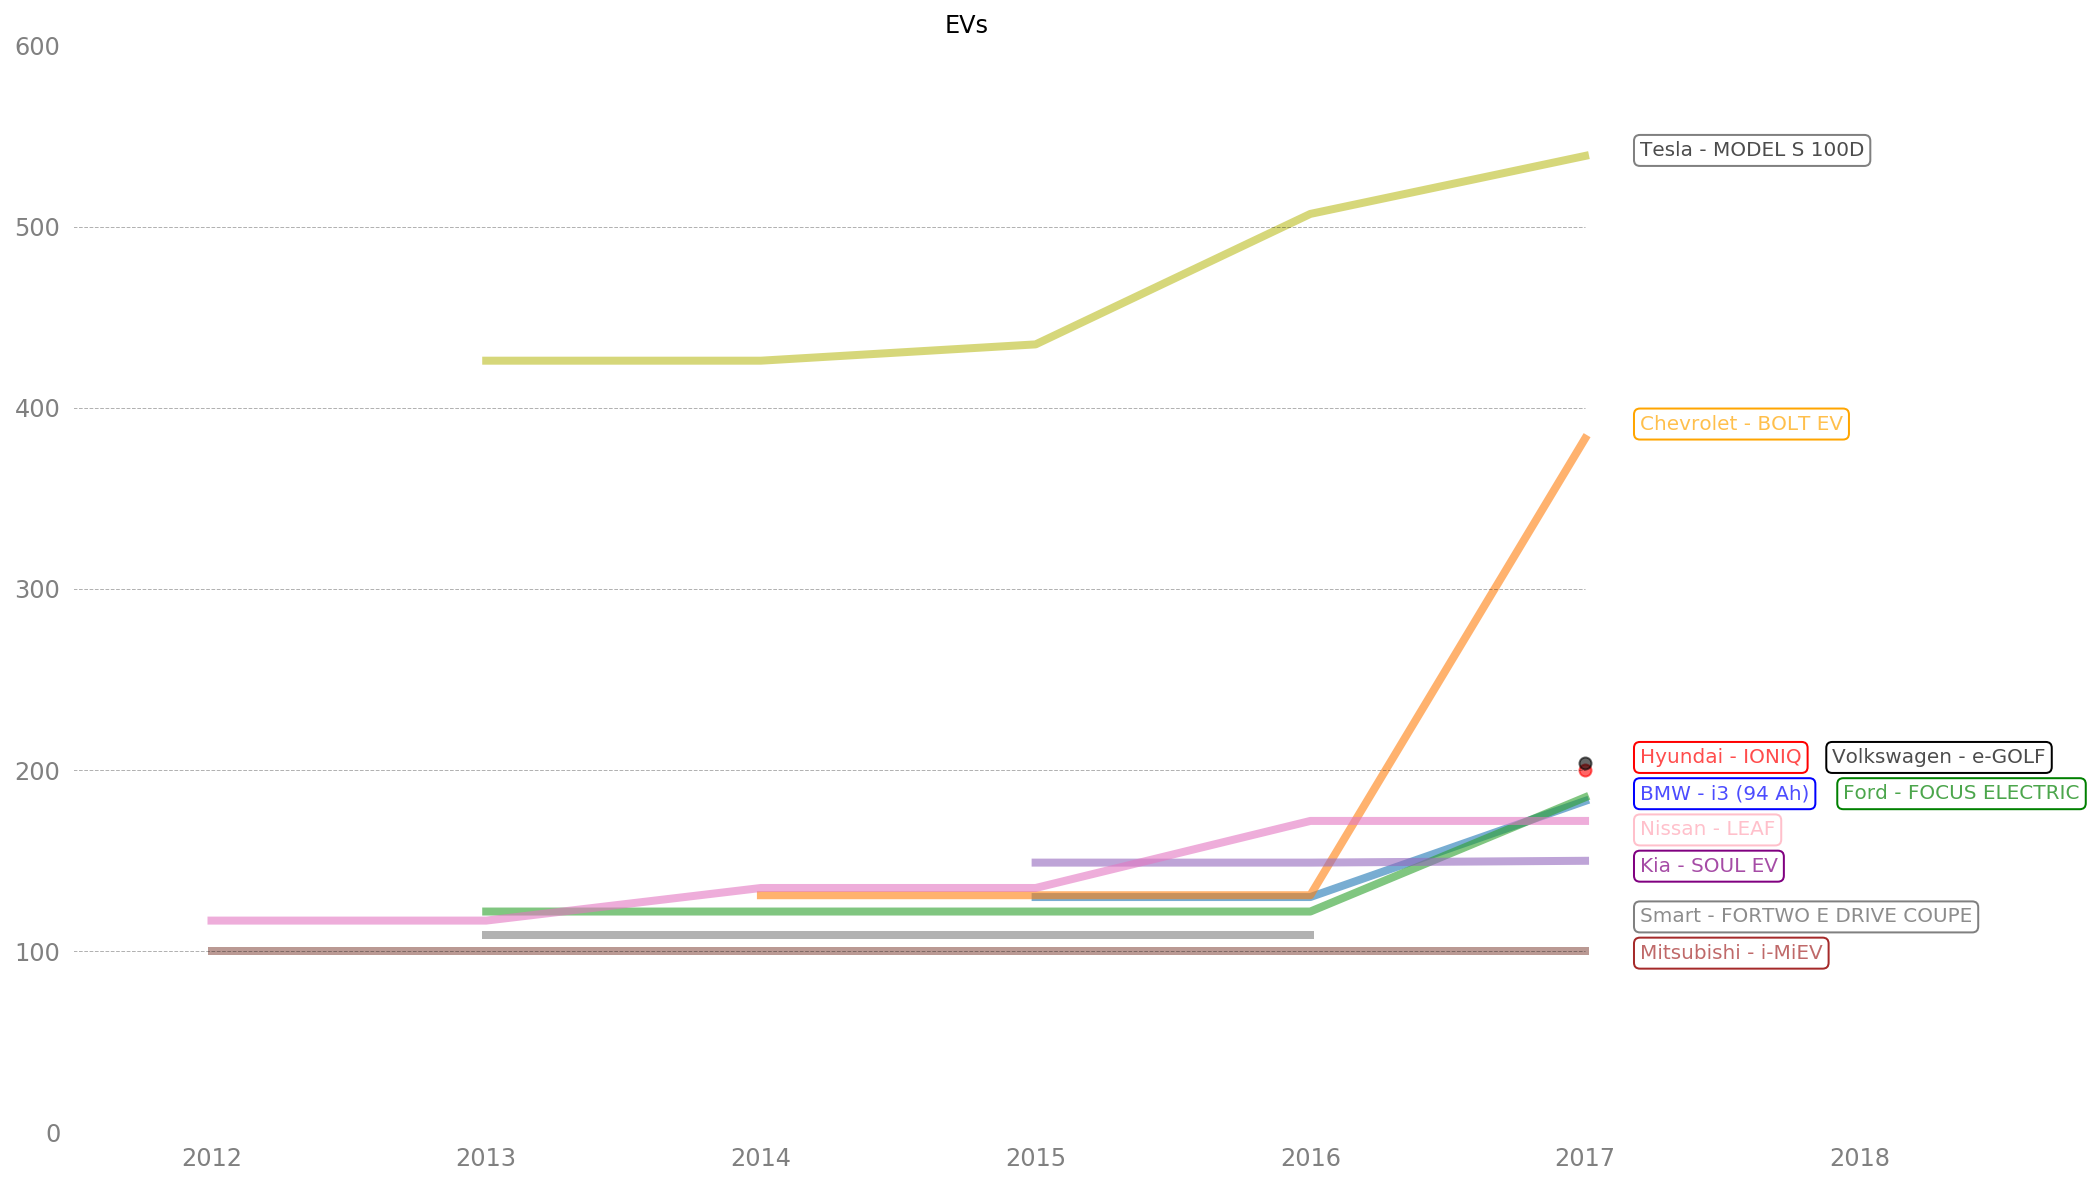

In [53]:
getData().groupby(['YEAR', "MAKE"]).max().unstack().plot(figsize=(16,10), kind='line', lw=4 ,alpha=0.6, legend=None, title='EVs');

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.plot([2017],[200], 'ro', alpha=0.6)  #add hyundai to the plot
plt.plot([2017], [204], 'ko', alpha=0.6) #add wolkswagen to the plot

plt.ylim([0, 600])    
plt.xlim([2011.5, 2018])

plt.yticks(fontsize=12, color='gray')    
plt.xticks(fontsize=12, color='gray') 

for y in range(0, 600, 100):    
    plt.plot(range(2011, 2018), [y] * len(range(2011, 2018)),"--", lw=0.5, color="black", alpha=0.3)  
#plt.legend(frameon=False)

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 
plt.xlabel('');

ax.annotate('Tesla - MODEL S 100D', xy=(2017.2, 539), size= 10, alpha=0.7, color='black', bbox={'boxstyle' :'round', 'edgecolor':'grey',  'facecolor':'1'});
ax.annotate('Chevrolet - BOLT EV', xy=(2017.2, 388), size= 10, alpha=0.7, color='orange', bbox={'boxstyle' :'round', 'edgecolor':'orange',  'facecolor':'1'});
ax.annotate('Ford - FOCUS ELECTRIC', xy=(2017.94, 184), size= 10, alpha=0.7, color='green', bbox={'boxstyle' :'round', 'edgecolor':'green',  'facecolor':'1'});
ax.annotate('BMW - i3 (94 Ah)', xy=(2017.2, 184), size= 10, alpha=0.7, color='blue', bbox={'boxstyle' :'round', 'edgecolor':'blue',  'facecolor':'1'});
ax.annotate('Nissan - LEAF', xy=(2017.2, 164), size= 10, alpha=1, color='pink', bbox={'boxstyle' :'round', 'edgecolor':'pink',  'facecolor':'1'});
ax.annotate('Kia - SOUL EV', xy=(2017.2, 144), size= 10, alpha=0.7, color='purple', bbox={'boxstyle' :'round', 'edgecolor':'purple',  'facecolor':'1'});
ax.annotate('Smart - FORTWO E DRIVE COUPE', xy=(2017.2, 116), size= 10, alpha=0.9, color='gray', bbox={'boxstyle' :'round', 'edgecolor':'gray',  'facecolor':'1'});
ax.annotate('Mitsubishi - i-MiEV', xy=(2017.2, 96), size= 10, alpha=0.7, color='brown', bbox={'boxstyle' :'round', 'edgecolor':'brown',  'facecolor':'1'});
ax.annotate('Hyundai - IONIQ', xy=(2017.2, 204), size= 10, alpha=0.7, color='red', bbox={'boxstyle' :'round', 'edgecolor':'red',  'facecolor':'1'});
ax.annotate('Volkswagen - e-GOLF', xy=(2017.9, 204), size= 10, alpha=0.7, color='black', bbox={'boxstyle' :'round', 'edgecolor':'black',  'facecolor':'1'});
#plt.savefig('EVs.png')